# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday March 3rd, 2025 at 23:55. Hand in your files via DTU Learn. 

## Part 1

From week 1's exercise, I'd like you to complete the "*Exercise 3*: Temporal patterns". The one where the main plot is the year-by-year evolution of the 10 focus crimes.

**IMPORTANT**: FOR THIS AND ALL SUBSEQUENT EXERCISES, I WANT YOU TO USE THE FULL DATASET FROM 2003 TO 2025.

In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import calplot
from matplotlib.ticker import FuncFormatter

We start by getting the data, which is stored as a pkl (see combine_dataframes.ipynb file for pkl file creation). We then define our focus crimes, and ensure the data is in the correct formats. 

In [4]:
path_to_data = "../../combined_df.pkl"

In [7]:
####################
##  DATA HANDLING ##
####################

df = pd.read_pickle(path_to_data)

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 
                   'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

df['Date'] = pd.to_datetime(df['Date'])
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()
focuscrime_df['Year'] = focuscrime_df['Date'].dt.year

# Group by 'Category' and 'Year' and count occurrences
crime_counts = (focuscrime_df.groupby(['Category', 'Year'])
                .size()
                .reset_index(name='Count'))

Now we the create the plot.

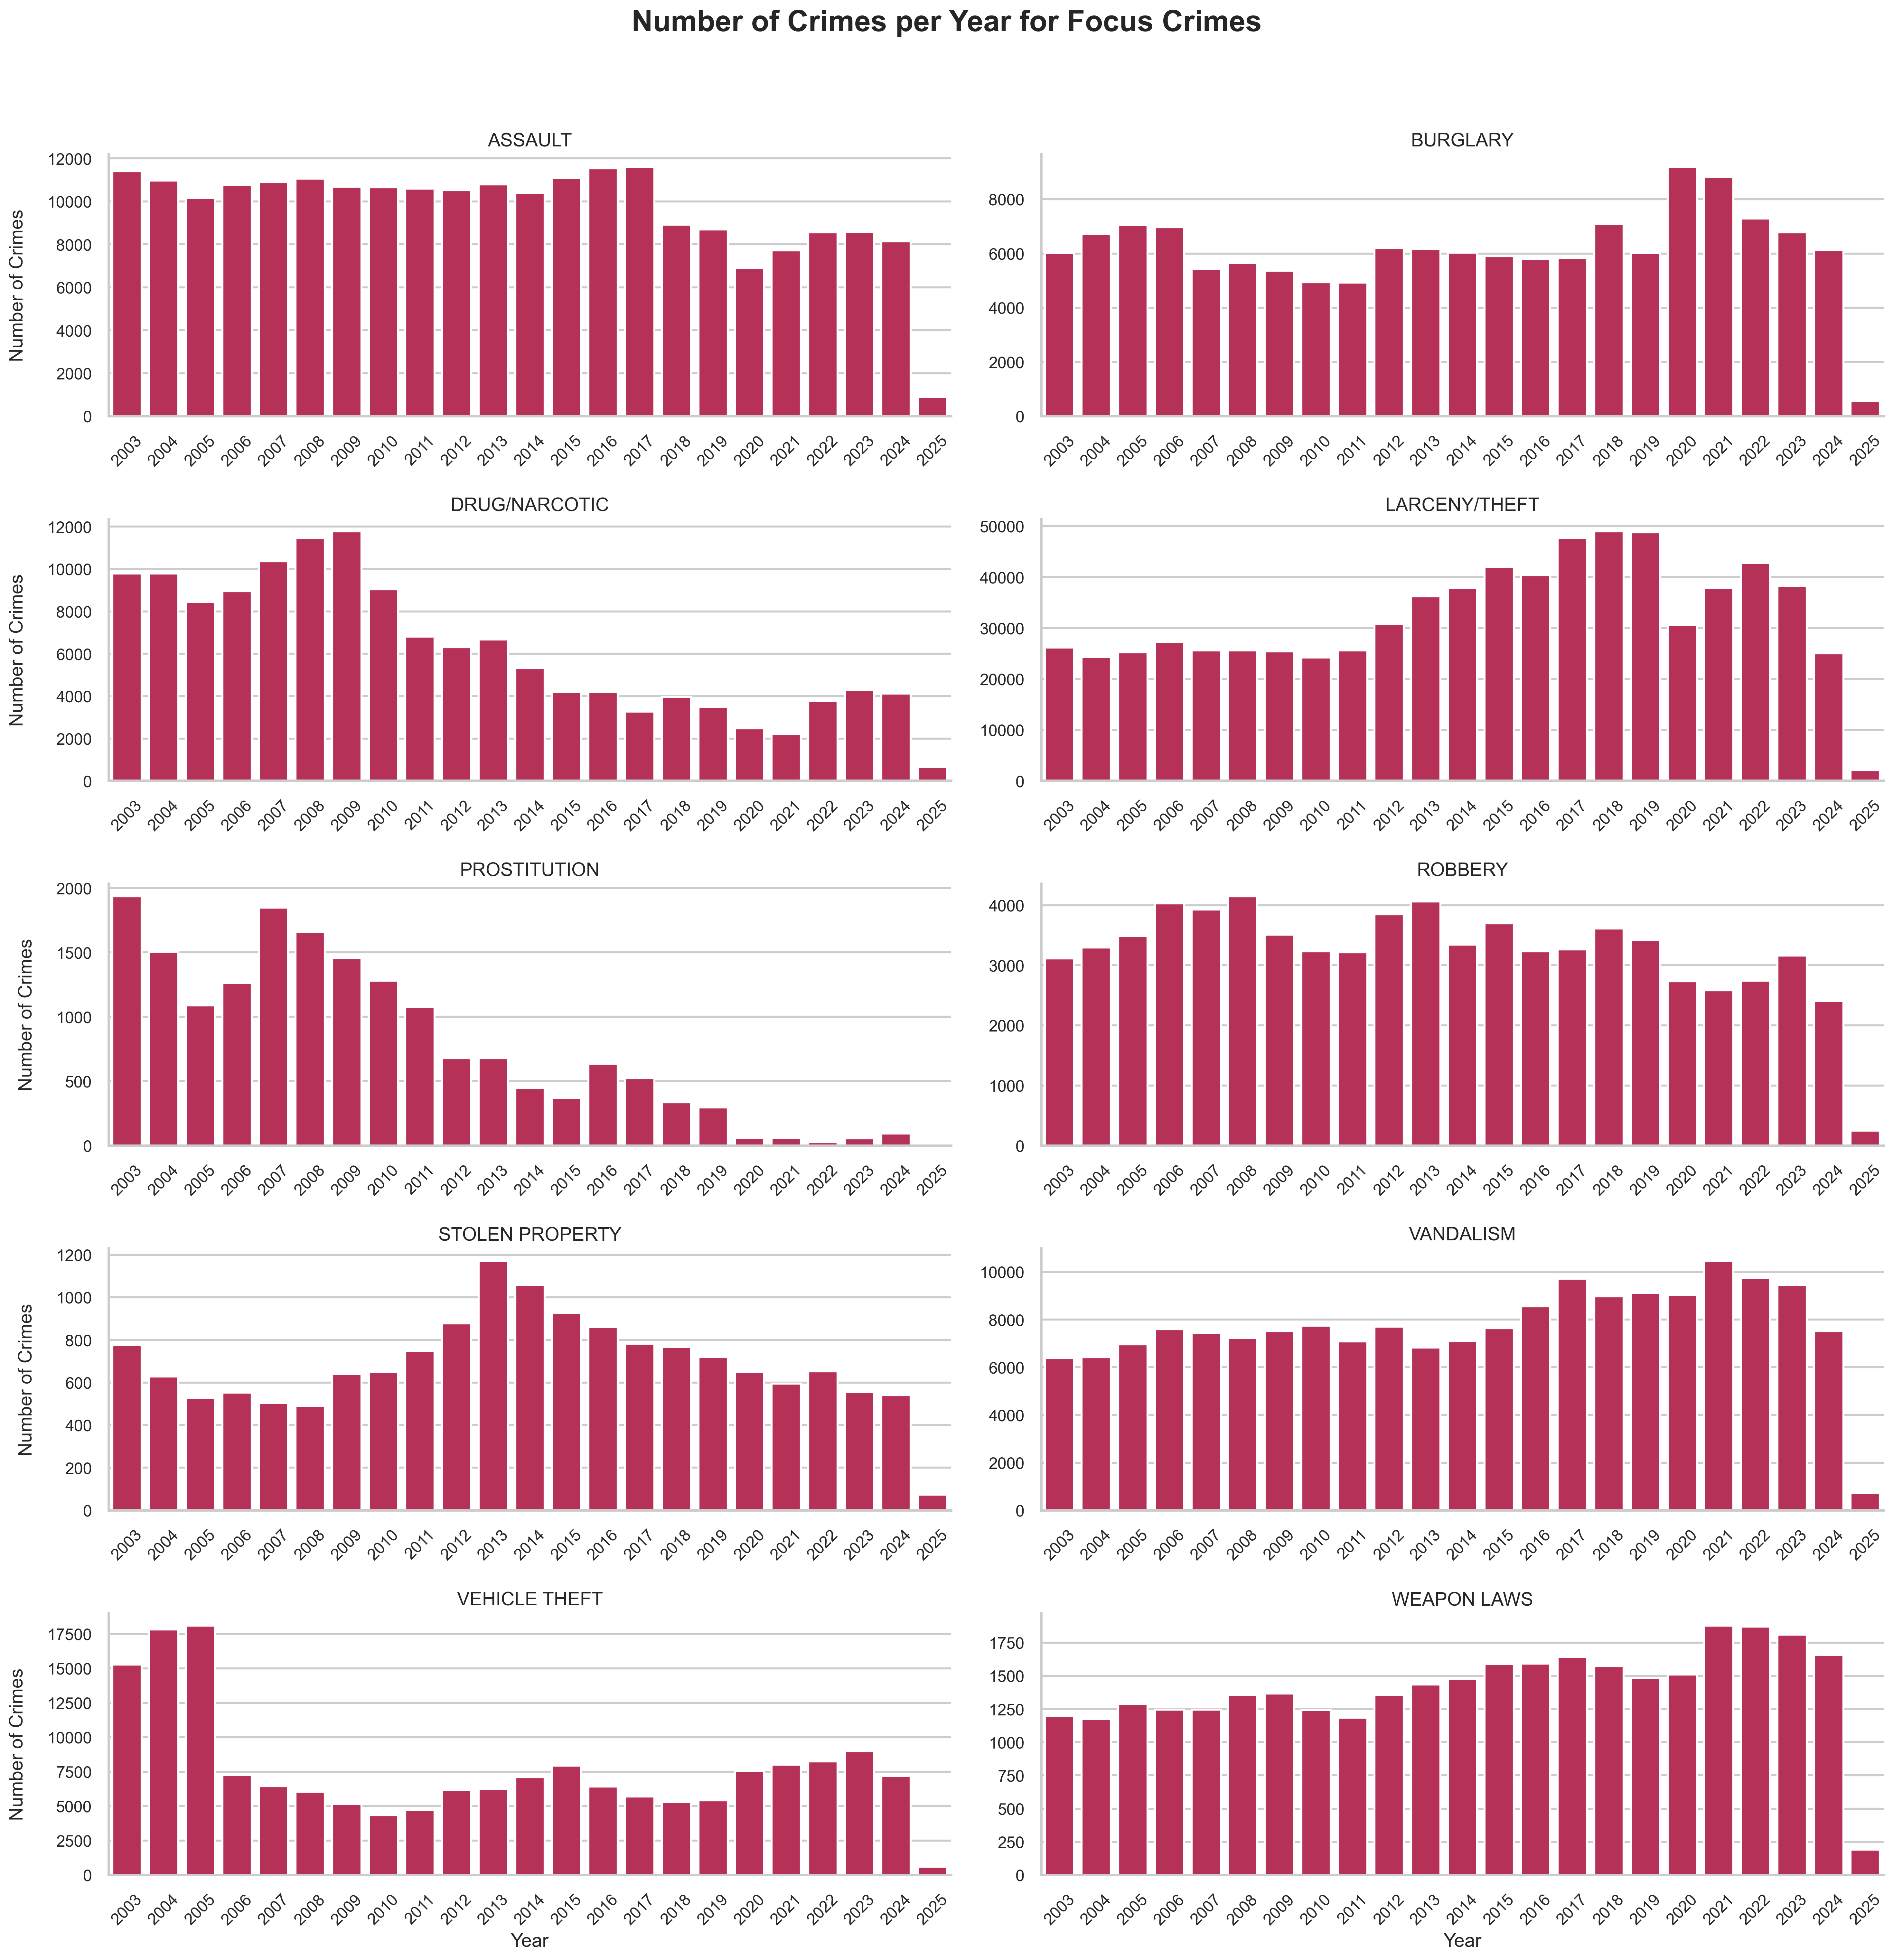

In [ ]:
#######################
##  FOCUSCRIMES PLOT ##
#######################

# --- PLOT CONFIGURATIONS ---
plt.rcParams['figure.dpi'] = 300

sns.set_context("talk", font_scale=1.1)
sns.set_style("whitegrid")  # Optional: use a clean grid style
plt.rcParams.update({
    'font.family': 'Arial',  # Optional: change font family for publications
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# Create a facet grid with free y-axis for each facet
g = sns.FacetGrid(crime_counts, col="Category", col_wrap=2, height=4, aspect=2.5, sharey=False, sharex=False)

# Extract a single color from the 'rocket' palette
rocket_color = sns.color_palette("rocket", 1)[0]

# Map a barplot to each facet
g.map_dataframe(sns.barplot, x="Year", y="Count", color=rocket_color)

# Customize axis labels and facet titles
g.set_axis_labels("Year", "Number of Crimes")
g.set_titles("{col_name}")

# Adjust spacing for y-axis label and tick labels
for ax in g.axes.flat:
    ax.yaxis.labelpad = 15
    ax.tick_params(axis='both', labelsize=12)
    # Rotate x-axis labels for readability
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    # Remove top and right spines for a cleaner look
    sns.despine(ax=ax)

# Add a main title for the entire figure
g.fig.suptitle("Number of Crimes per Year for Focus Crimes", fontsize=22, fontweight='bold', y=1.02)

# Tight layout to prevent overlaps
plt.tight_layout()

# Optionally, save the figure as a high-resolution image
#g.savefig("publication_quality_plot.png", dpi=300, bbox_inches="tight")

plt.show()

> This plot a a facetted bar chart, and it shows the total number of different crime incidents per year from 2003 to 2025. We can see that the distribution of crimes vary depending on the type of crime. 

## Part 2

Next, I would like you to answer some of the questions related to the videos shown during week 2. Specifically, I would like you to

* Answer questions related to the main video-lecture on Data Visualization. (Where the first question is "What is the difference between *data* and *metadata*?")
* Answer questions related to the video on "Nice plots". That is, generate the list of 10 rules for nice plots.


>### Answers to questions related to the main video-lecture on Data vizualization: 


What is the difference between data and metadata? How does that relate to the GPS tracks-example?

"Data" is non-abstract observations, also referred to as raw data. This could refer to a file of text and numbers. In the GPS-tracks example from the video, this would be the GPS data from the "Garmin Connect" file.
"Metadata", on the other hand, is data about data. It adds richness by providing context for raw data. In the GPS-tracks example, it is the details about the trip from the GPS raw data.

Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.

Yes, it makes sense that the human eye is designed to evaluate information and surroundings for survival. This could reflect "data analysis". Eventually, it is also the human eye and intuition that evaluates the plots created with data vizualization tools. 

The human eye (or brain) is good at spotting patterns and trends [2]. An example would be reading a book or text, where a spelling mistake would be easily noticed, as it deviates from the usual patterns of how words and sentences are structured. In line with this logic, plots with observable trends/patterns/clusters are easily evaluated.

Something that is difficult to notice is small color/size differences. Slighty different shades of a color could be difficult to tell apart. This might be due to the optical illusions the human eye can experience when evaluating colors.  For instance, Simultaneous Contrast Illusion (Michel-Eugène Chevreul, 1839), where  colors appear different depending on the colors surrounding them [1].

Simpson's paradox is hard to explain. Come up with your own example - or find one online.

Simpson's paradox is when a pattern you see in separate groups disappears (or reverses) when you combine the groups.
An example from (https://brilliant.org/wiki/simpsons-paradox/) states that two students complete assignments over the weekend. Student 1 has a higher accuracy than student 2 on both days. But when you combine the groups, student 1 has a higher total percentage. This is due to student 1 completing more tasks than student 2 over the weekend in total [3].

In your own words, explain the differnece between exploratory and explanatory data analysis.


Exploratory: Examine unexpected trends/patterns that appear when you visualize the data. 

Explanatory: Focused on communicating information or results found from data analysis.


[1] Mattson, M. P., & Chang, L. (2014). Superior pattern processing is the essence of the evolved human brain. Frontiers in Neuroscience, 8(8 AUG), 265. https://doi.org/10.3389/FNINS.2014.00265

[2] Kuehni, R. G. (2002). Michel-Eugène Chevreul: From laws and principles to the production of colour plates. Color Research & Application, 27(1), 4–14. https://doi.org/10.1002/COL.10000

[3] https://brilliant.org/wiki/simpsons-paradox/

> ### Answers to questions related to the video on "Nice plots"









## Part 3

We stay with week 2. I would also like you to complete the exercise in Week 2, Part 4, entitled "*Exercise*: Other cool ways to plot temporal data" (the one where we explore alternatives to bar-plots, such as calendar plots, for plotting temporal data).

In the exercise, i ask you to explore 3 different types of plots. For this assignment, you only need to do a calendar and polar bar chart.


> ### Calendar Plot

The first plot we decided to make was a calendar plot, showing the number of robbery incidents from 2018-2021. 

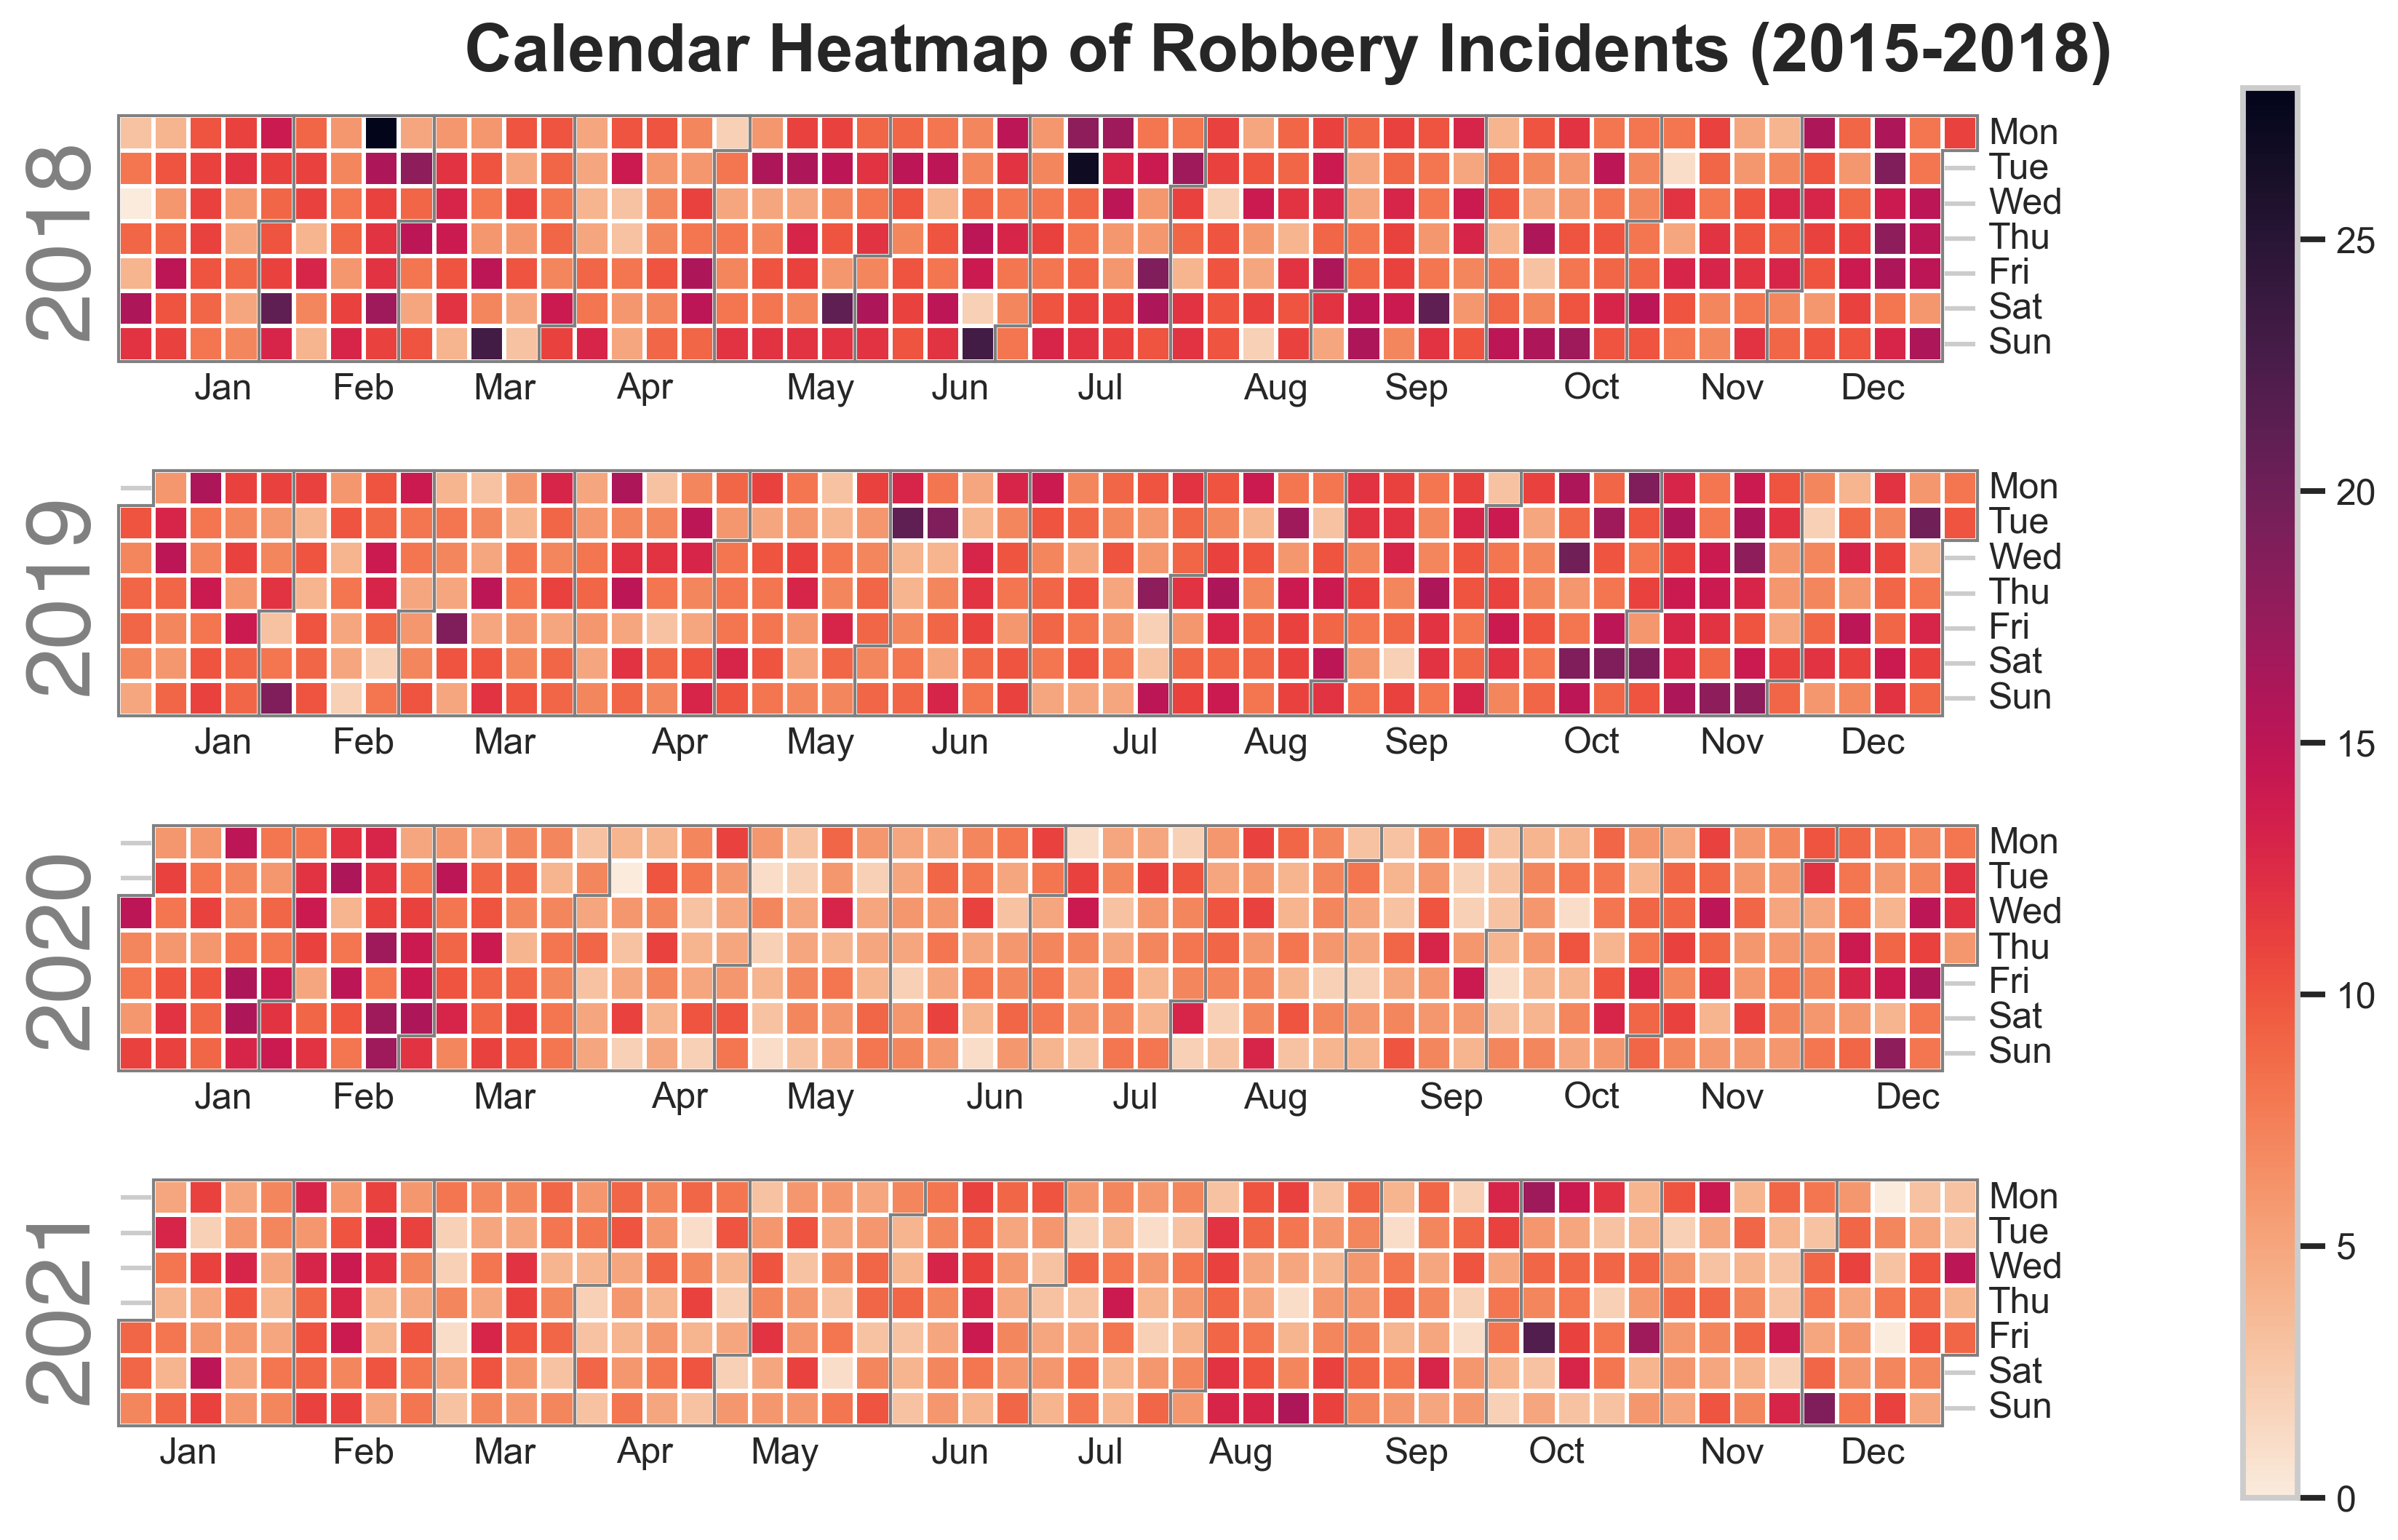

In [ ]:
# --- PLOT CONFIGURATIONS ---
plt.rcParams['figure.dpi'] = 300  # High-resolution rendering

sns.set_context("talk", font_scale=1.1)  # Talk-like, publication-quality context
sns.set_style("whitegrid")              # White grid style for clarity

plt.rcParams.update({
    'font.family': 'Arial',       # Global font
    'axes.labelsize': 14,         # Axis label size
    'xtick.labelsize': 12,        # X-tick label size
    'ytick.labelsize': 12         # Y-tick label size
})

# Consistent color extraction from the 'rocket' palette
rocket_color = sns.color_palette("rocket")

# --- Data preparation ---
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter for 'ROBBERY' category and for dates between 2015 and 2018
robbery_df = df[(df['Category'] == 'ROBBERY') &
                (df['Date'] >= '2018-01-01') &
                (df['Date'] <= '2021-12-31')].copy()

# Group by the date (ignoring time) and count occurrences per day
robbery_daily = robbery_df.groupby(robbery_df['Date'].dt.date).size()

# Convert the index to datetimex for calplot compatibility
robbery_daily.index = pd.to_datetime(robbery_daily.index)

# --- Create a rocket colormap using Seaborn ---
rocket_cmap = sns.color_palette("rocket_r", as_cmap=True)

# --- Plotting with calplot ---
calplot.calplot(
    robbery_daily,
    cmap=rocket_cmap
)

# Add an overall title with the specified formatting
plt.suptitle("Calendar Heatmap of Robbery Incidents (2015-2018)",
             fontsize=22, fontweight='bold', y=1.02)

plt.show()

> This heat map calendar plot shows the number of daily robbery incidents from 2018 to 2021. It seems that as corona virus pandemic appears in 2020, the number of robberies seem to decrease

> ### Polar plot

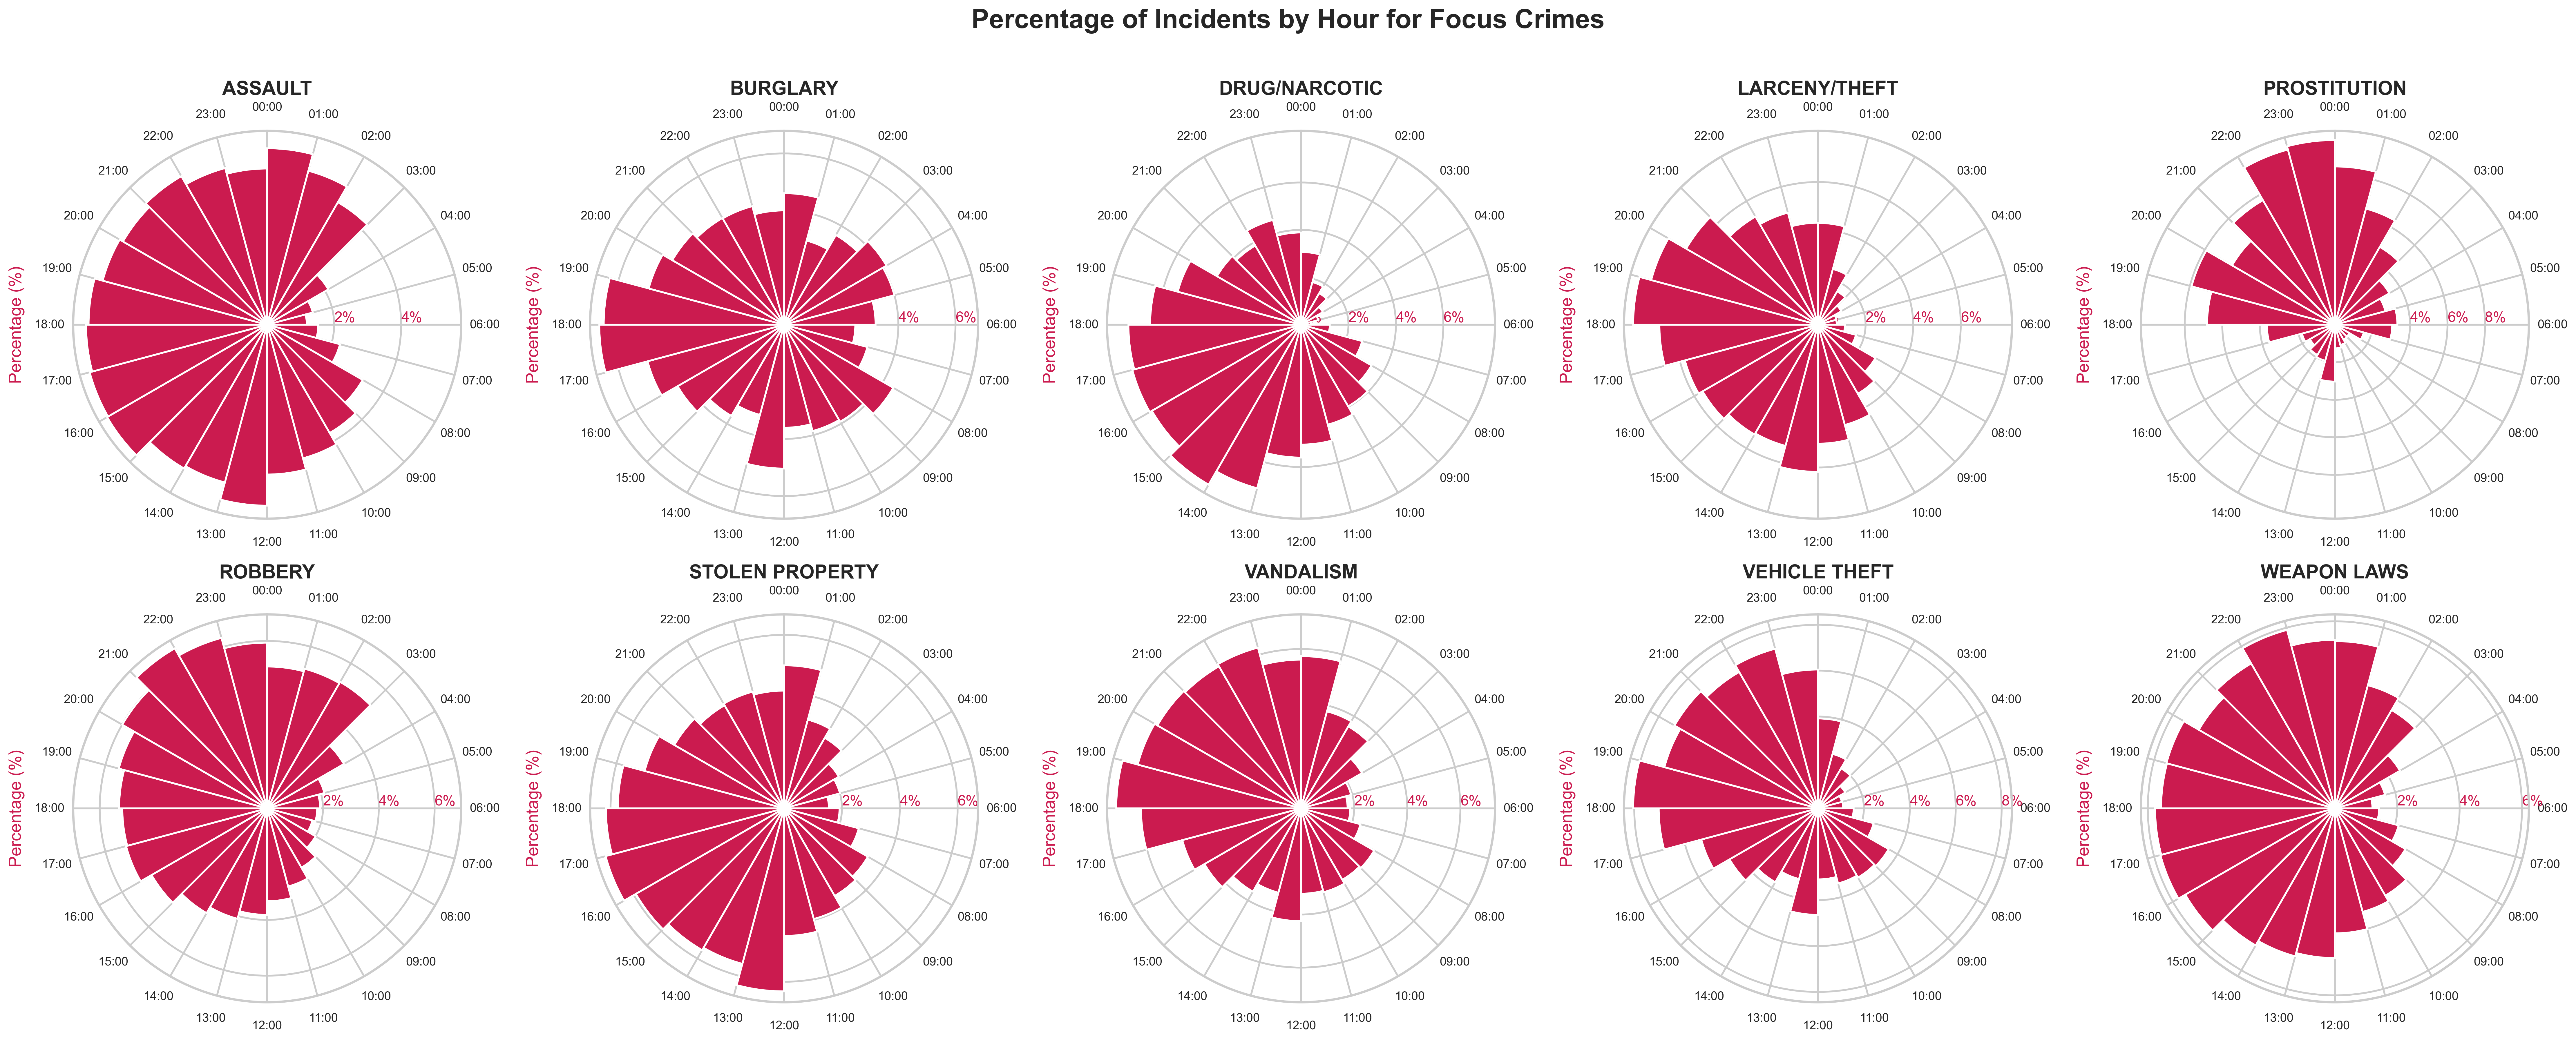

In [ ]:
# --- PLOT CONFIGURATIONS ---
plt.rcParams['figure.dpi'] = 300  # High-resolution rendering
sns.set_context("talk", font_scale=1.1)  # Talk-like context for publications
sns.set_style("whitegrid")  # Clean grid style
plt.rcParams.update({
    'font.family': 'Arial',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 10  # Reduced y-axis tick font size
})

# Filter DataFrame for focus crimes only
focuscrime_df['Hour'] = focuscrime_df['Time'].dt.hour

# Group by Category and Hour to count total incidents (across all days)
sum_hourly = (focuscrime_df.groupby(['Category', 'Hour'])
              .size()
              .reset_index(name='TotalCount'))

# Compute the total incidents per category and then percentage per hour
total_counts = (sum_hourly.groupby('Category')['TotalCount']
                .sum()
                .reset_index(name='CategoryTotal'))
sum_hourly = pd.merge(sum_hourly, total_counts, on='Category')
sum_hourly['PctCount'] = sum_hourly['TotalCount'] / sum_hourly['CategoryTotal'] * 100

# Map each hour (0-23) to its corresponding angle (0-2π)
sum_hourly['Angle'] = sum_hourly['Hour'] / 24 * 2 * np.pi

categories = sorted(focuscrimes)
n_categories = len(categories)
n_cols = 5
n_rows = int(np.ceil(n_categories / n_cols))

# Create subplots with polar projection for each facet
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': 'polar'},
                         figsize=(n_cols * 6, n_rows * 6))
axes = axes.flatten()

# Color and bar width settings
rocket_color = sns.color_palette("rocket", 1)[0]
bar_width = 2 * np.pi / 24

# Formatter to show tick labels as percentages
formatter = FuncFormatter(lambda x, pos: f'{x:.0f}%')

# Plot each facet
for i, cat in enumerate(categories):
    ax = axes[i]
    # Filter data for current category
    cat_data = sum_hourly[sum_hourly['Category'] == cat]
    
    # Ensure all 24 hours are represented; fill missing hours with 0%
    all_hours = pd.DataFrame({'Hour': np.arange(24)})
    all_hours['Angle'] = all_hours['Hour'] / 24 * 2 * np.pi
    cat_data = pd.merge(all_hours, cat_data, on=['Hour', 'Angle'], how='left')
    cat_data['PctCount'] = cat_data['PctCount'].fillna(0)
    
    # Create the polar bar plot
    ax.bar(cat_data['Angle'], cat_data['PctCount'], width=bar_width,
           align='edge', color=rocket_color)
    
    # Configure the polar axis to mimic a clock:
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    
    # Set theta ticks for each hour formatted as "HH:00"
    ticks = np.linspace(0, 2 * np.pi, 24, endpoint=False)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f"{i:02d}:00" for i in range(24)], fontsize=10)

    ax.set_rlabel_position(90) 

    # Dynamically generate y-ticks in intervals of 2, stopping before exceeding max pct
    max_pct = cat_data['PctCount'].max()
    if max_pct < 2:
        tick_vals = [0, max_pct]
    else:
        tick_vals = np.arange(0, max_pct + 0.1, 2)
    ax.set_yticks(tick_vals)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis='y', labelsize=12, colors=rocket_color)
    # Inside your plotting loop, after setting tick parameters:
    ax.set_ylabel("Percentage (%)", labelpad=40, fontsize=14, color=rocket_color)

    
    # Set facet title with extra padding
    ax.set_title(cat, fontsize=16, fontweight='bold', pad=30)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Global main title and radial axis label
fig.suptitle("Percentage of Incidents by Hour for Focus Crimes", fontsize=22, fontweight='bold', y=1.0)

plt.tight_layout()
plt.show()


> This polar barplot shows the hourly percentage distribution of crime incidents for the focus crimes subset. Each bar represents the percentage of that type of crime incidents for every hour of the day. 

## Part 4

From week 3, I'd like you to work on the exercise contained in Week 3, Part 3. Specifically, I would like you to **both** complete "*Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset" and "*Excercise Part 2*". These exercises focus on reproducing figure 2.1, 2.4 and 2.11 and exploring a few more ideas from the book using data from SFPD.


## Part 5

Finally, I'd like you to work on the exercise "*Exercise*: Using all the tools to understand the temporal trends of prostitution in SF over time" in Week 4, Part 3. 